logistic regression results:
accuracy: 0.8152

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        75
           1       0.86      0.83      0.84       109

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



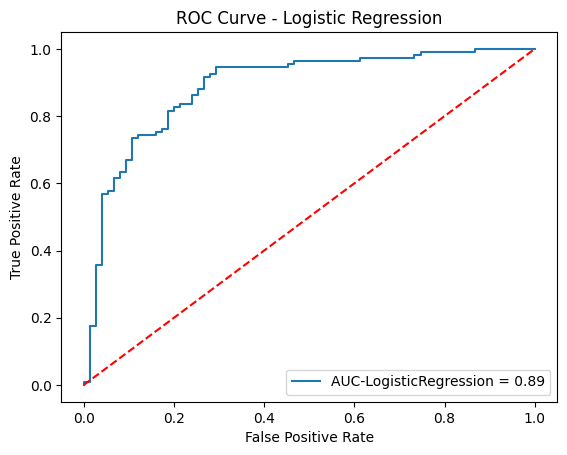

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
#load the X_selected and Y
Y = np.load("Y.npy")
X_selected = np.load("X_selected.npy",allow_pickle=True)
#split into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X_selected,Y,train_size=0.8,random_state=42)
#train the LogisticRegression model
LR_model=LogisticRegression(max_iter=1000,random_state=42)
LR_model.fit(X_train,Y_train)
#prediction
y_pred_lr=LR_model.predict(X_test)
y_pred_prob_lr=LR_model.predict_proba(X_test)[:,1]
#evaluate the model
print('logistic regression results:')
print(f'accuracy: {accuracy_score(Y_test,y_pred_lr):.4f}')
print('\nClassification report:')
print(classification_report(Y_test,y_pred_lr))
# ROC & AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob_lr)
auc_score = roc_auc_score(Y_test, y_pred_prob_lr)

plt.plot(fpr, tpr, label=f"AUC-LogisticRegression = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

Decision Tree results:
accuracy: 0.7663

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.84      0.75        75
           1       0.87      0.72      0.78       109

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.76       184
weighted avg       0.79      0.77      0.77       184



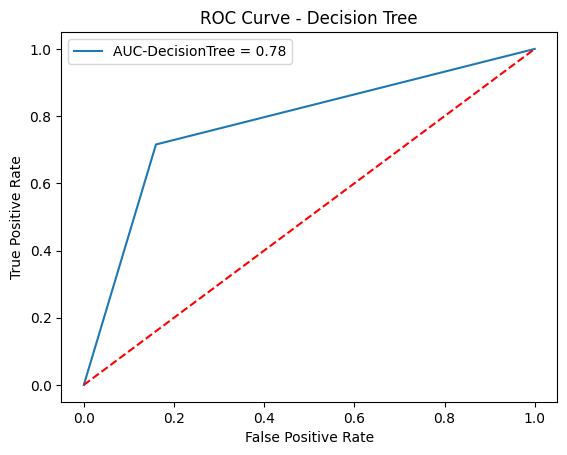

In [3]:
#Decision Tree model
DT_model=DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train,Y_train)
#prediction
y_pred_dt=DT_model.predict(X_test)
y_pred_prob_dt=DT_model.predict_proba(X_test)[:,1]
#evaluate the model
print('Decision Tree results:')
print(f'accuracy: {accuracy_score(Y_test,y_pred_dt):.4f}')
print('\nClassification report:')
print(classification_report(Y_test,y_pred_dt))
# ROC & AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob_dt)
auc_score = roc_auc_score(Y_test, y_pred_prob_dt)

plt.plot(fpr, tpr, label=f"AUC-DecisionTree = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

Random Forest results:
accuracy: 0.8370

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        75
           1       0.86      0.86      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



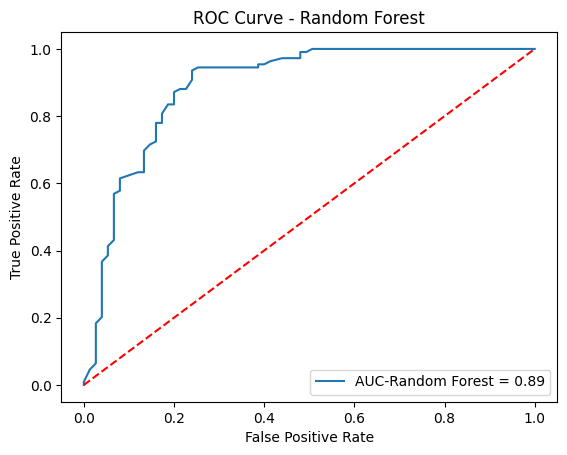

In [4]:
#Random Forest Model
model_rf=RandomForestClassifier(random_state=42)
model_rf.fit(X_train,Y_train)
#prediction
y_pred_rf=model_rf.predict(X_test)
y_pred_prob_rf=model_rf.predict_proba(X_test)[:,1]
#evaluate the model
print('Random Forest results:')
print(f'accuracy: {accuracy_score(Y_test,y_pred_rf):.4f}')
print('\nClassification report:')
print(classification_report(Y_test,y_pred_rf))
# ROC & AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob_rf)
auc_score = roc_auc_score(Y_test, y_pred_prob_rf)

plt.plot(fpr, tpr, label=f"AUC-Random Forest = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

SVM results:
accuracy: 0.7228

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65        75
           1       0.76      0.78      0.77       109

    accuracy                           0.72       184
   macro avg       0.71      0.71      0.71       184
weighted avg       0.72      0.72      0.72       184



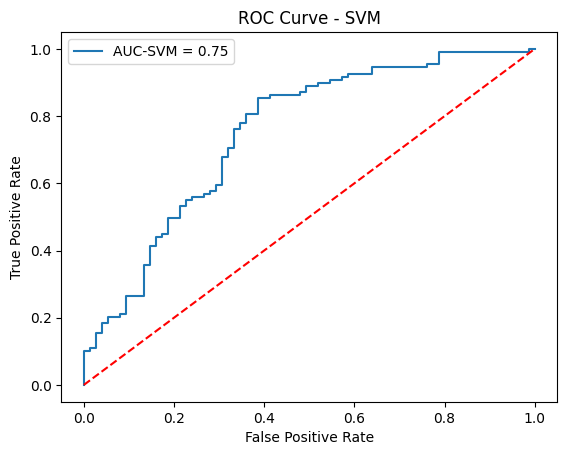

In [5]:
#SVM Model
model_svm=SVC(probability=True,random_state=42)
model_svm.fit(X_train,Y_train)
#prediction
y_pred_svm=model_svm.predict(X_test)
y_pred_prob_svm=model_svm.predict_proba(X_test)[:,1]
#evaluate the model
print('SVM results:')
print(f'accuracy: {accuracy_score(Y_test,y_pred_svm):.4f}')
print('\nClassification report:')
print(classification_report(Y_test,y_pred_svm))
# ROC & AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob_svm)
auc_score = roc_auc_score(Y_test, y_pred_prob_svm)

plt.plot(fpr, tpr, label=f"AUC-SVM = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

In [6]:
# save 
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("Y_train.npy", Y_train)
np.save("Y_test.npy", Y_test)
